In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = pd.read_csv("E:\heart.csv")

In [3]:
data.shape

(918, 12)

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
print(data['ChestPainType'].value_counts())

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


In [7]:
print(data['RestingECG'].value_counts())

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


In [8]:
print(data['ExerciseAngina'].value_counts())

N    547
Y    371
Name: ExerciseAngina, dtype: int64


In [9]:
print(data['ST_Slope'].value_counts())

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [10]:
# Checking for null values in the dataset
print("Age null entries: ",data['Age'].isnull().sum(), ", ",
      "Sex null entries: ",data['Sex'].isnull().sum(), ", ",
      "ChestPainType null enries: ", data['ChestPainType'].isnull().sum(), ", ",
      "RestingBP null entries: ",data['RestingBP'].isnull().sum(), ", ",
      "Cholesterol null entries: ",data['Cholesterol'].isnull().sum(), ", ",
      "FastingBS null entries: ",data['FastingBS'].isnull().sum(), ", ",
      "RestingECG null entries: ",data['RestingECG'].isnull().sum(), ", ",
      "MaxHR null entries: ",data['MaxHR'].isnull().sum(), ", ",
      "ExerciseAngina null entries: ",data['ExerciseAngina'].isnull().sum(), ", ",
      "Oldpeak null entries: ",data['Oldpeak'].isnull().sum(), ", ",
      "ST_Slope null entries: ",data['ST_Slope'].isnull().sum(), ", ",
      "HeartDisease null entries: ",data['HeartDisease'].isnull().sum())
print(data.isnull().values.any())

Age null entries:  0 ,  Sex null entries:  0 ,  ChestPainType null enries:  0 ,  RestingBP null entries:  0 ,  Cholesterol null entries:  0 ,  FastingBS null entries:  0 ,  RestingECG null entries:  0 ,  MaxHR null entries:  0 ,  ExerciseAngina null entries:  0 ,  Oldpeak null entries:  0 ,  ST_Slope null entries:  0 ,  HeartDisease null entries:  0
False


In [11]:
# Checking for duplicate values
data.duplicated().any()

False

<Axes: ylabel='Frequency'>

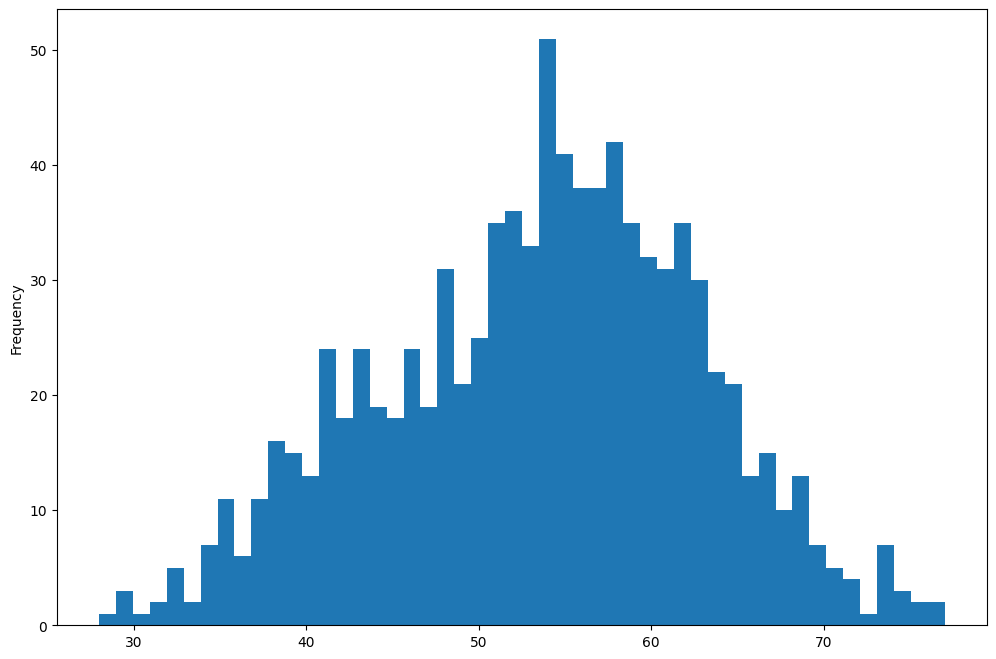

In [12]:
data['Age'].plot(kind='hist', bins=50, figsize=(12, 8))

<Axes: ylabel='Frequency'>

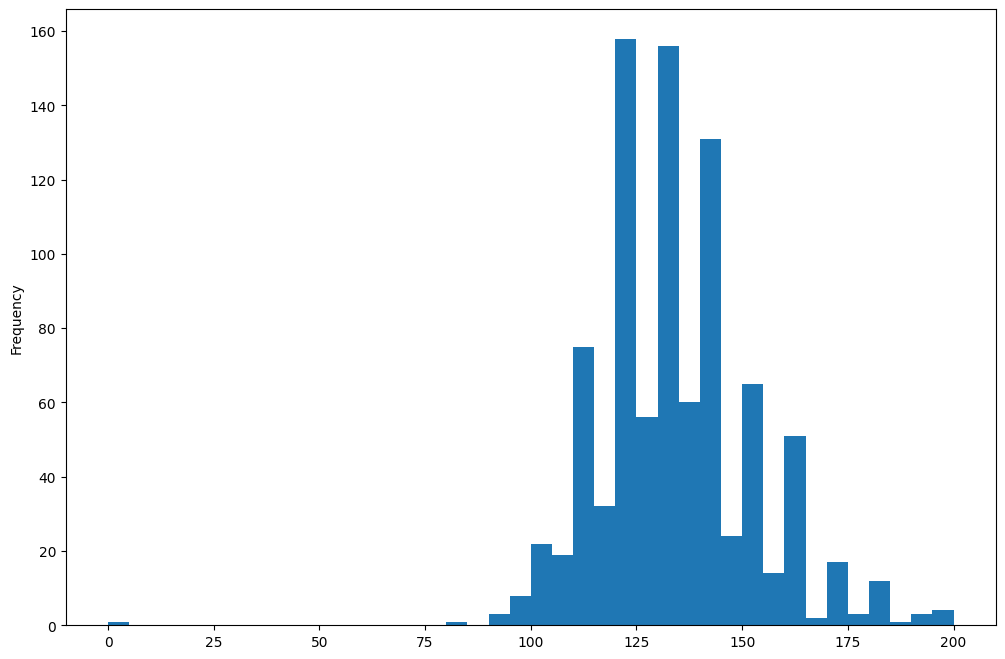

In [13]:
data['RestingBP'].plot(kind='hist', bins=40, figsize=(12, 8))

<Axes: >

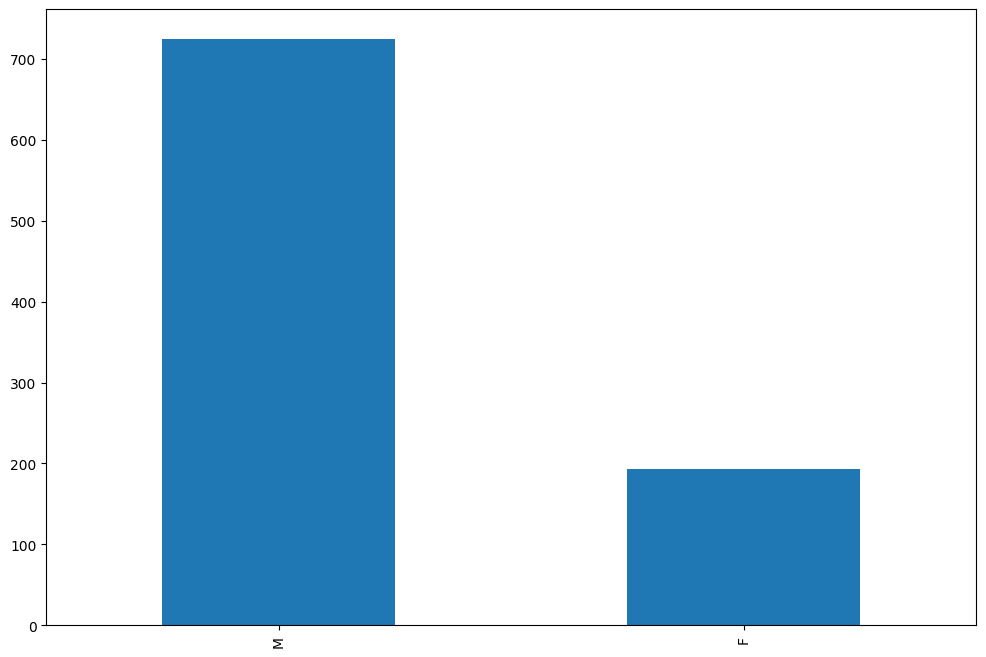

In [14]:
data['Sex'].value_counts().plot(kind='bar', figsize=(12, 8))

<Axes: >

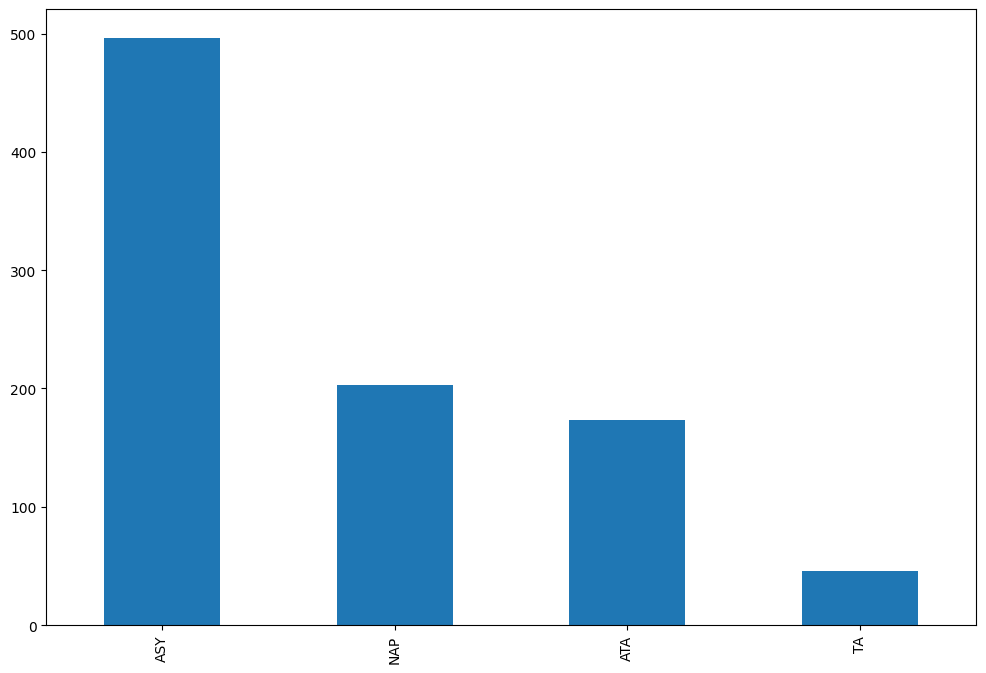

In [15]:
data['ChestPainType'].value_counts().plot(kind='bar', figsize=(12, 8))

<Axes: ylabel='RestingECG'>

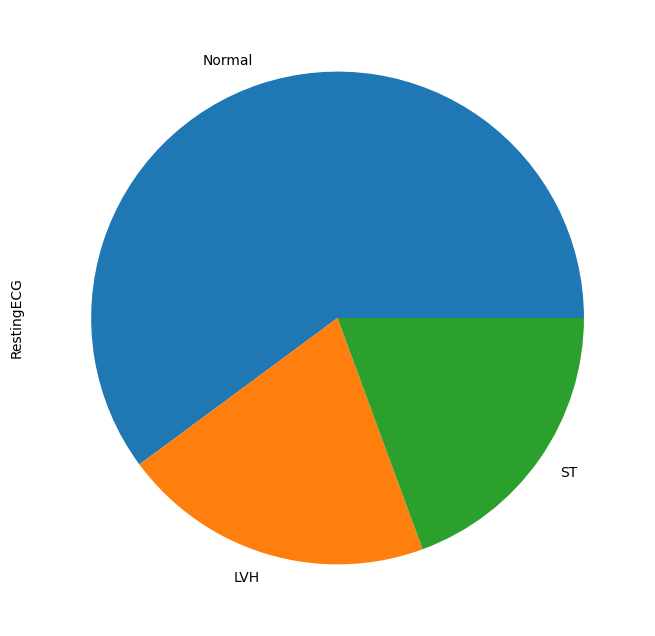

In [16]:
data['RestingECG'].value_counts().plot(kind='pie', figsize=(12, 8))

<Axes: ylabel='ST_Slope'>

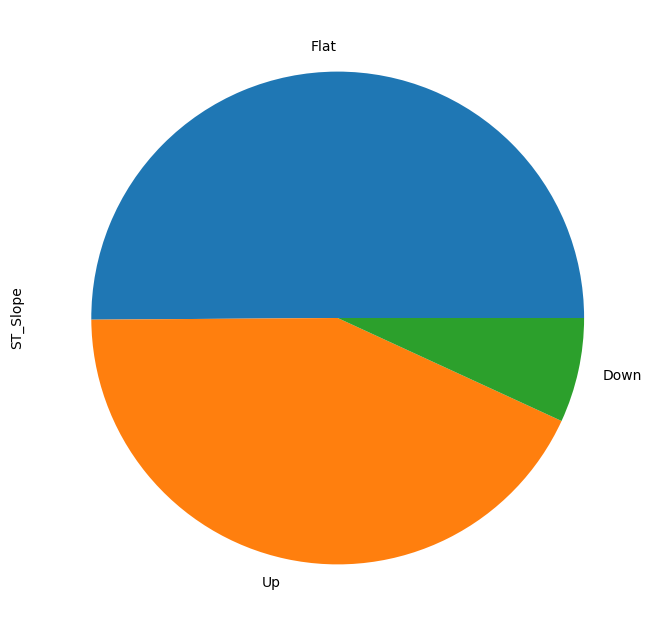

In [17]:
data['ST_Slope'].value_counts().plot(kind='pie', figsize=(12, 8))

<Axes: ylabel='Density'>

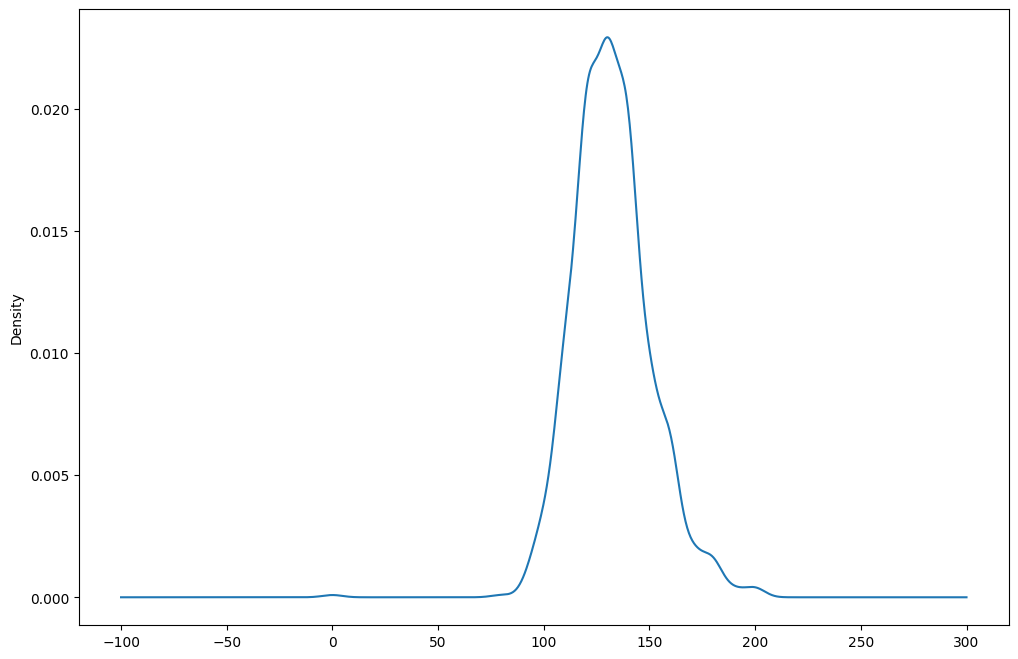

In [18]:
data['RestingBP'].plot(kind='kde', figsize=(12, 8))

<Axes: ylabel='Density'>

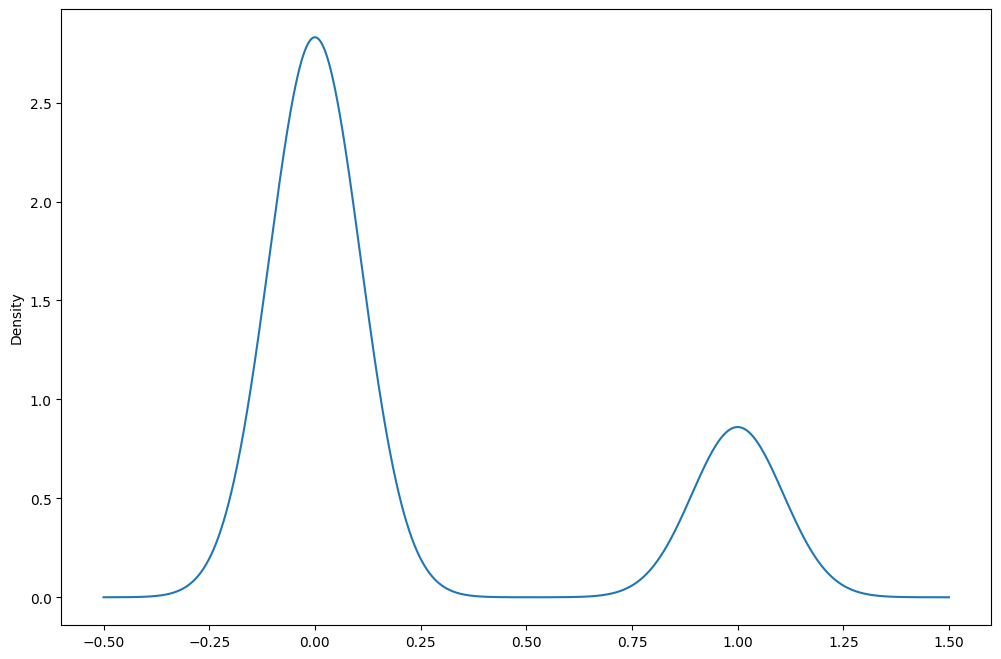

In [19]:
data['FastingBS'].plot(kind='kde', figsize=(12, 8))

<Axes: ylabel='Density'>

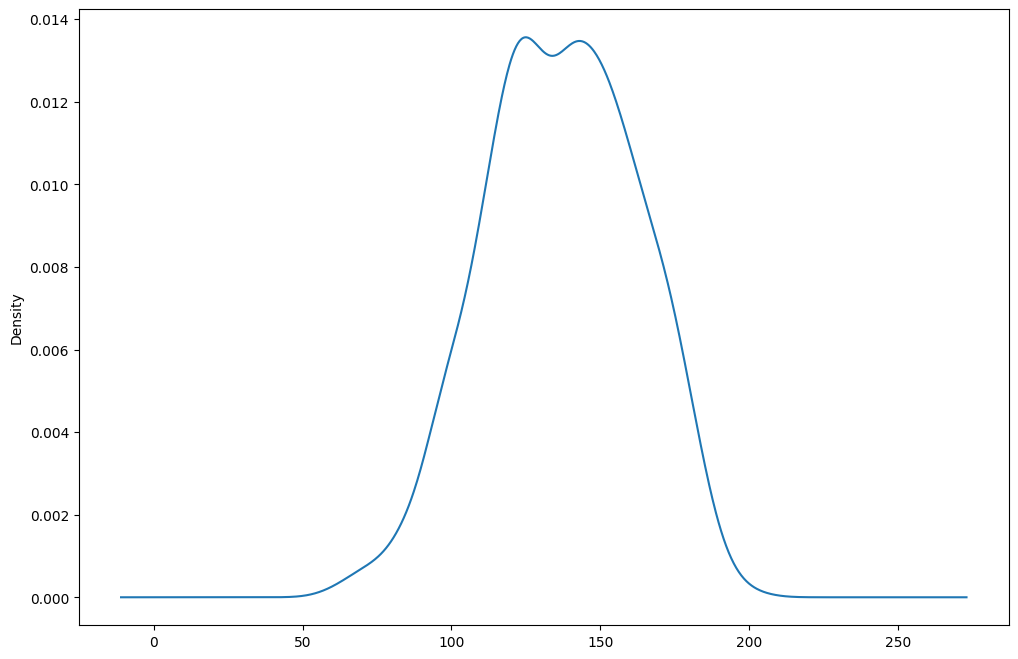

In [20]:
data['MaxHR'].plot(kind='kde', figsize=(12, 8))

<Axes: ylabel='Density'>

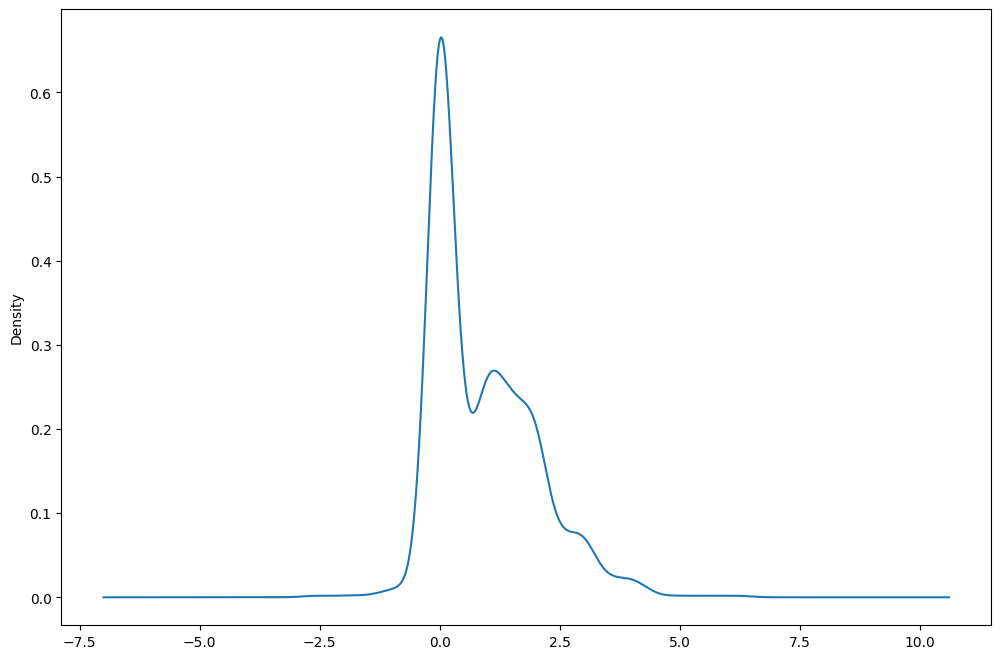

In [21]:
data['Oldpeak'].plot(kind='kde', figsize=(12, 8))

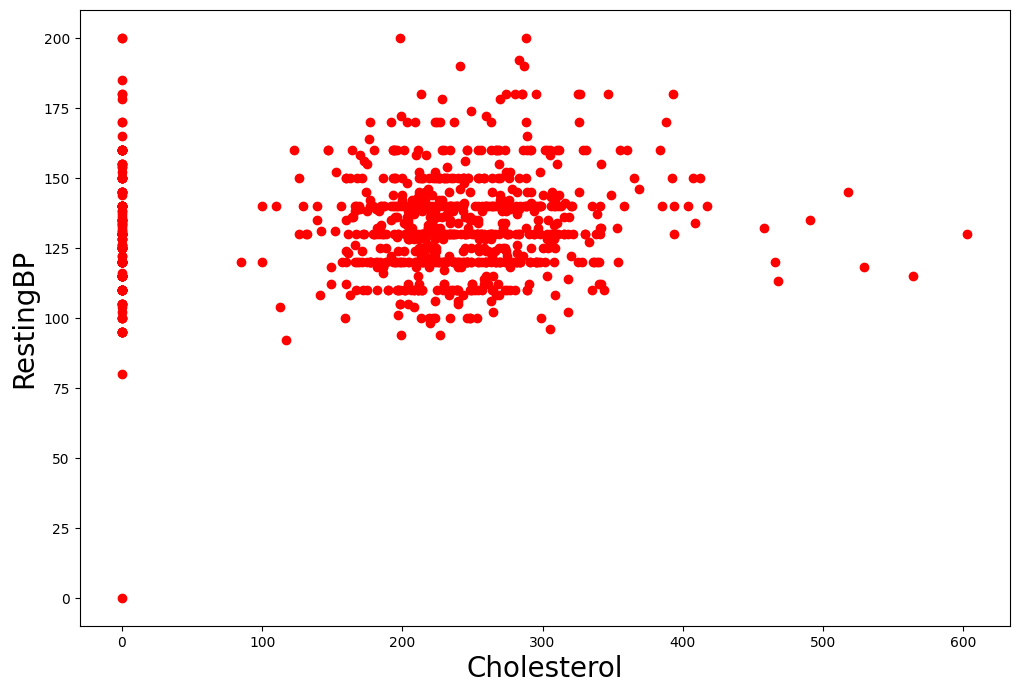

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Cholesterol'], data['RestingBP'], color='red')
plt.xlabel("Cholesterol", size=20)
plt.ylabel("RestingBP", size=20)
plt.show()


<Axes: title={'center': 'Age/RestingBP'}, xlabel='Age', ylabel='RestingBP'>

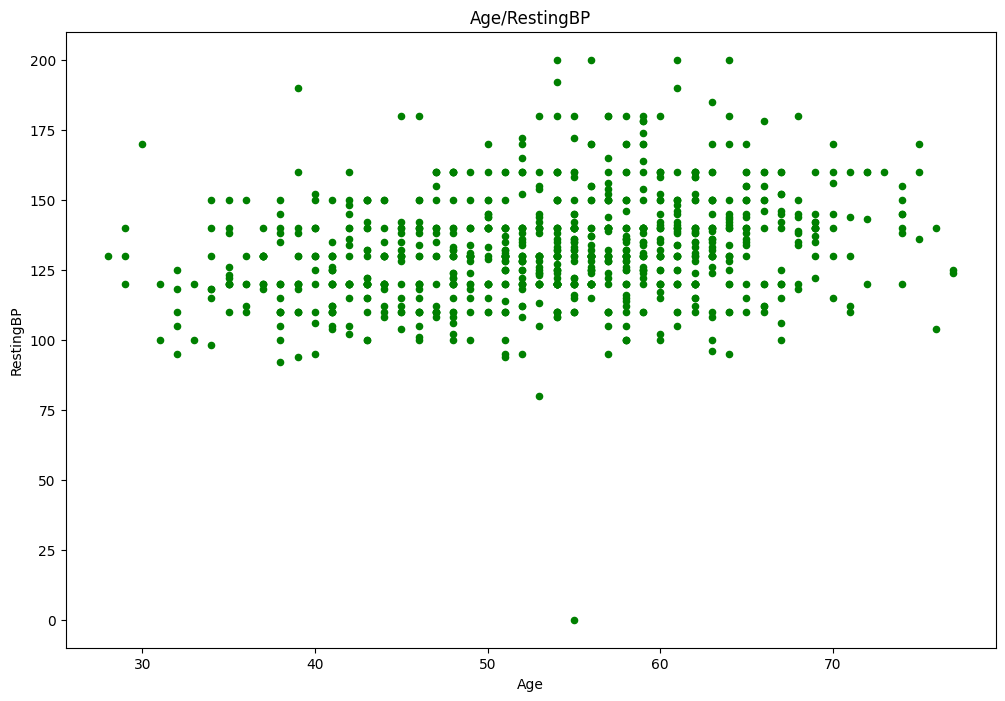

In [23]:
data.plot(title='Age/RestingBP',kind='scatter', x='Age', y='RestingBP', color='green', figsize=(12, 8))

<Axes: title={'center': 'Oldpeak/Age scatter'}, xlabel='Oldpeak', ylabel='Age'>

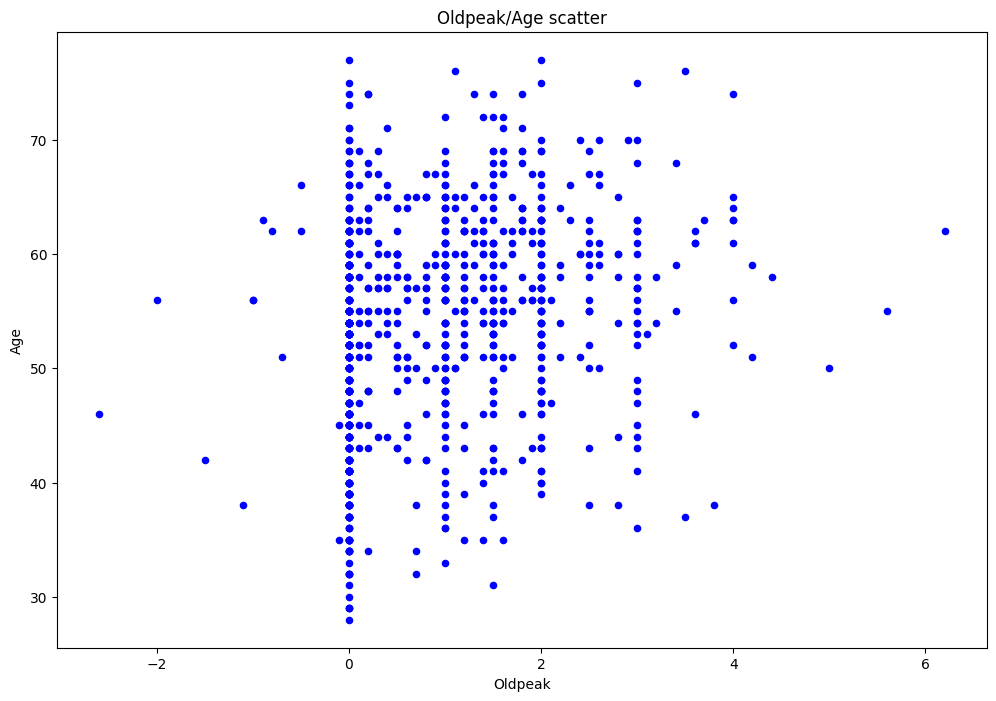

In [24]:
data.plot(title='Oldpeak/Age scatter', x='Oldpeak', y='Age',kind='scatter', color='blue', figsize=(12, 8))

<Axes: title={'center': 'MaxHR/Cholesterol scattera'}, xlabel='MaxHR', ylabel='Cholesterol'>

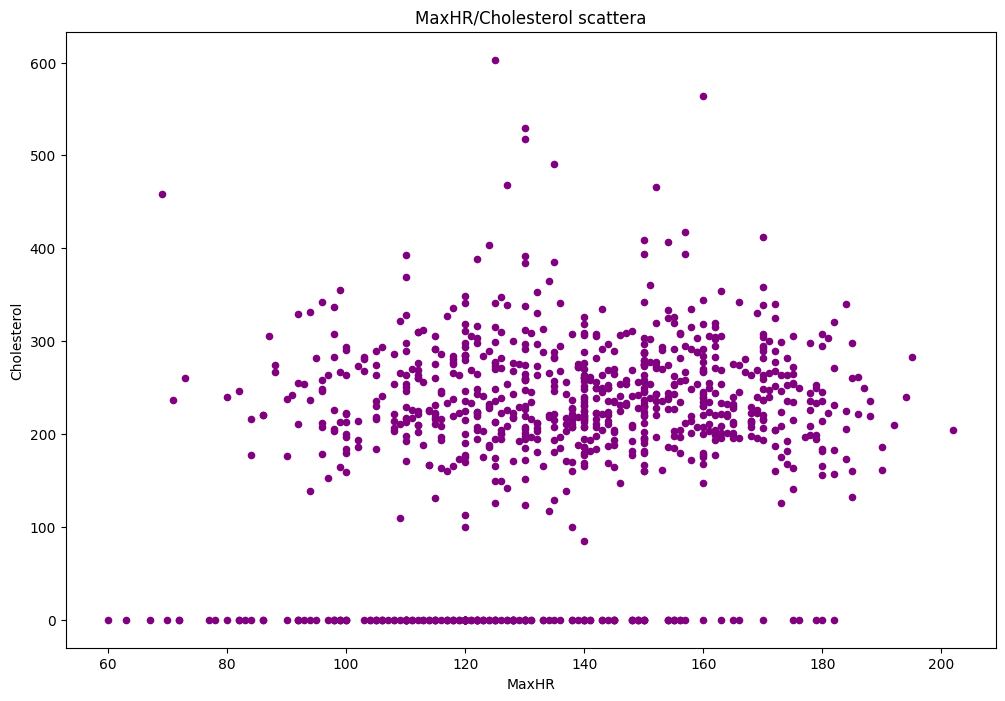

In [25]:
data.plot(title='MaxHR/Cholesterol scattera', x='MaxHR', y='Cholesterol',kind='scatter', color='purple', figsize=(12, 8))

<Axes: title={'center': 'MaxHR/Age scatter'}, xlabel='Age', ylabel='MaxHR'>

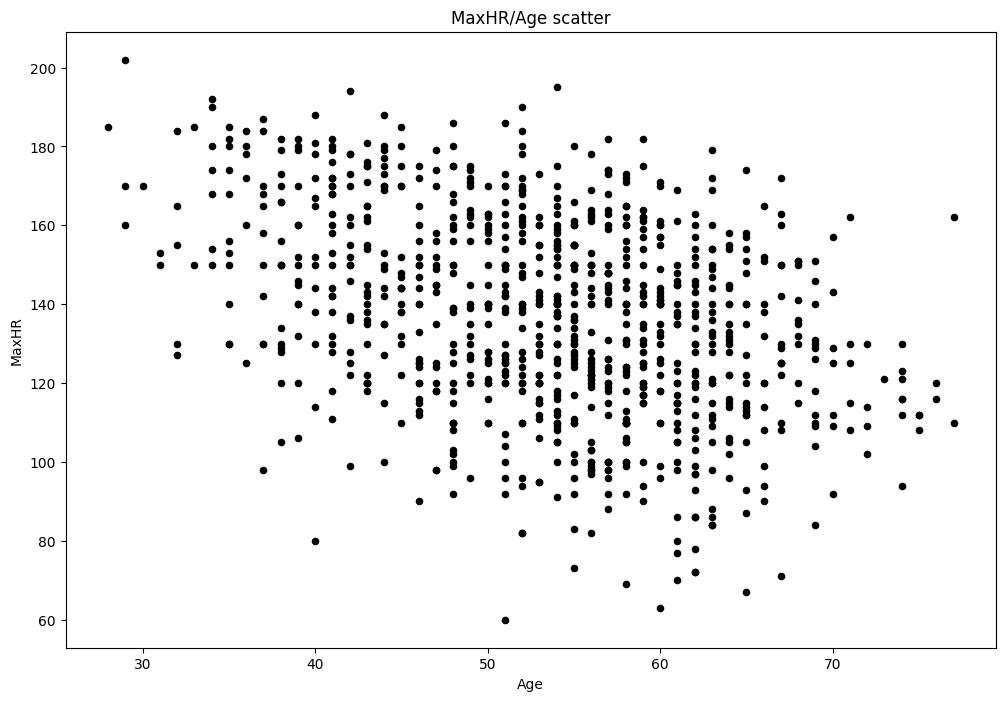

In [26]:
data.plot(title='MaxHR/Age scatter', x='Age', y='MaxHR',kind='scatter', color='black', figsize=(12, 8))

In [27]:
data.corr()

C:\Users\shaker\AppData\Local\Temp\ipykernel_7788\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


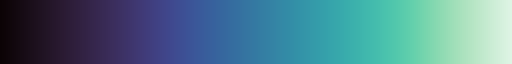

In [28]:
sns.color_palette("mako", as_cmap=True)

C:\Users\shaker\AppData\Local\Temp\ipykernel_7788\3345143275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = data.corr()


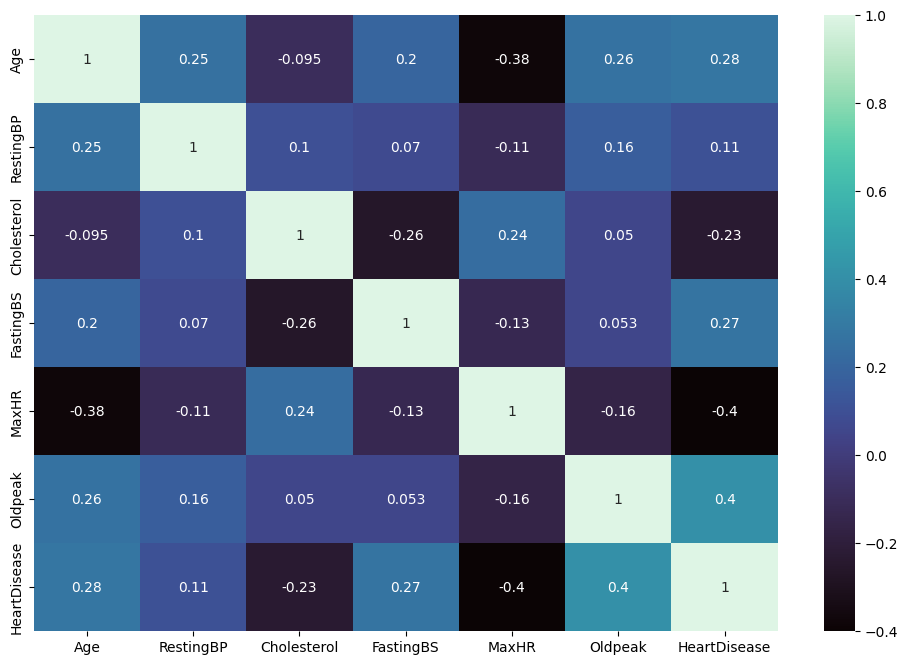

In [29]:
corr_map = data.corr()
top_corr_features = corr_map.index
plt.figure(figsize=(12,8))
corr_heatmap = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="mako")

In [30]:
# copying the data to preserve the original dataset
data_copy = data.copy()

In [31]:
ohe = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(ohe.fit_transform(data_copy[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]).toarray())
encoder_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
f_data_copy = data_copy.join(encoder_df)
f_data_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,4,5,6,7,8,9,10,11,12,13
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
f_data_copy.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
f_data_copy.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,0,1,2,...,4,5,6,7,8,9,10,11,12,13
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object),
 array(['LVH', 'Normal', 'ST'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Down', 'Flat', 'Up'], dtype=object)]

In [35]:
f_data_copy.columns

Index([         'Age',    'RestingBP',  'Cholesterol',    'FastingBS',
              'MaxHR',      'Oldpeak', 'HeartDisease',              0,
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11,             12,
                   13],
      dtype='object')

In [36]:
input_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
output_feature = ['HeartDisease']
x = f_data_copy[input_features].values
y = f_data_copy[output_feature].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [37]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(734, 20) (734, 1) (184, 20) (184, 1)


In [38]:
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=1)

In [39]:
model.feature_importances_

array([0.0748357 , 0.0755625 , 0.10462386, 0.01988079, 0.09911211,
       0.09339912, 0.02294021, 0.02244359, 0.08542546, 0.02519714,
       0.01377775, 0.00628312, 0.01440595, 0.01006058, 0.00975124,
       0.03818242, 0.05847471, 0.0058532 , 0.109973  , 0.10981757])

In [40]:
prediction = model.predict(x_test)

In [41]:
from sklearn import metrics
print('Train Score: ', model.score(x_train, y_train))
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, prediction)))
print('Test Score: ', model.score(x_test, y_test)) 

Train Score:  1.0
Accuracy = 0.902
Test Score:  0.9021739130434783


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.91      0.93      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [43]:
print(confusion_matrix(y_test, prediction))

[[ 64  10]
 [  8 102]]
